In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

from ecbdata import ecbdata



In [2]:
df_in = ecbdata.get_series('ICP.M.U2.N.000000.4.ANR', start='2015-01') 
df_ir = pd.read_csv('ECB_InterestRates.csv') # Source: https://data.ecb.europa.eu/data/datasets/FM/FM.B.U2.EUR.4F.KR.MRR_FR.LEV?chart_props=W3sibm9kZUlkIjoiMzQ2NTY5IiwicHJvcGVydGllcyI6W3siY29sb3JIZXgiOiIiLCJjb2xvclR5cGUiOiIiLCJjaGFydFR5cGUiOiJsaW5lY2hhcnQiLCJsaW5lU3R5bGUiOiJTb2xpZCIsImxpbmVXaWR0aCI6IjEuNSIsImF4aXNQb3NpdGlvbiI6ImxlZnQiLCJvYnNlcnZhdGlvblZhbHVlIjpmYWxzZSwiZGF0ZXMiOlsiMjAxNS0wNi0xNFQyMjowMDowMC4wMDBaIiwiMjAyNC0wNi0xMVQyMjowMDowMC4wMDBaIl0sImlzVGRhdGEiOmZhbHNlLCJtb2RpZmllZFVuaXRUeXBlIjoiIiwieWVhciI6ImRhdGV3aXNlIiwic3RhcnREYXRlIjoiMjAxNS0wNi0xNSIsImVuZERhdGUiOiIyMDI0LTA2LTEyIiwic2V0RGF0ZSI6dHJ1ZSwic2hvd1RhYmxlRGF0YSI6ZmFsc2UsImNoYW5nZU1vZGUiOmZhbHNlLCJzaG93TWVudVN0eWxlQ2hhcnQiOmZhbHNlLCJkaXNwbGF5TW9iaWxlQ2hhcnQiOnRydWUsInNjcmVlblNpemUiOiJtYXgiLCJzY3JlZW5XaWR0aCI6MTQ3MCwic2hvd1RkYXRhIjpmYWxzZSwidHJhbnNmb3JtZWRGcmVxdWVuY3kiOiJub25lIiwidHJhbnNmb3JtZWRVbml0Ijoibm9uZSIsImZyZXF1ZW5jeSI6Im5vbmUiLCJ1bml0Ijoibm9uZSIsIm1vZGlmaWVkIjoiZmFsc2UiLCJzZXJpZXNLZXkiOiJkYWlseSAtIGJ1c2luZXNzd2VlayIsInNob3d0YWJsZVN0YXRlQmVmb3JlTWF4U2NyZWVuIjpmYWxzZSwiaXNkYXRhY29tcGFyaXNvbiI6ZmFsc2UsInNlcmllc0ZyZXF1ZW5jeSI6ImRhaWx5IC0gYnVzaW5lc3N3ZWVrIiwiaW50aWFsU2VyaWVzRnJlcXVlbmN5IjoiZGFpbHkgLSBidXNpbmVzc3dlZWsiLCJtZXRhZGF0YURlY2ltYWwiOiI0IiwiaXNUYWJsZVNvcnRlZCI6ZmFsc2UsImlzWWVhcmx5VGRhdGEiOmZhbHNlLCJyZXNwb25zZURhdGFFbmREYXRlIjoiMjAyNC0wNi0xMiIsImlzaW5pdGlhbENoYXJ0RGF0YSI6dHJ1ZSwiaXNEYXRlc0Zyb21EYXRlUGlja2VyIjp0cnVlLCJkYXRlUGlja2VyRW5kRGF0ZSI6IjIwMjQtMDYtMTIiLCJpc0RhdGVQaWNrZXJFbmREYXRlIjp0cnVlLCJzZXJpZXNrZXlTZXQiOiIiLCJkYXRhc2V0SWQiOiI2NyIsImlzQ2FsbGJhY2siOmZhbHNlLCJpc1NsaWRlclRkYXRhIjp0cnVlLCJpc1NsaWRlckRhdGEiOnRydWUsImlzSW5pdGlhbENoYXJ0RGF0YUZyb21HcmFwaCI6ZmFsc2UsImNoYXJ0U2VyaWVzS2V5IjoiRk0uQi5VMi5FVVIuNEYuS1IuTVJSX0ZSLkxFViIsInR5cGVPZiI6IiJ9XX1d
final_data = pd.read_csv("Final_Working_Data.csv")

In [3]:
data_subset = final_data[['Date', 'pos_metaphors_len']]
grouped_data = data_subset.groupby('Date').agg({'pos_metaphors_len': ['count', 'sum']})

In [4]:
final_data['Date'] = pd.to_datetime(final_data['Date'])
final_data['Month'] = final_data['Date'].dt.to_period('M')

# Step 3 & 4: Group by 'Month' and aggregate 'pos_metaphors_len'
grouped_data = final_data.groupby('Month').agg(count=('pos_metaphors_len', 'count'), #Number of interviews
                                                sum=('pos_metaphors_len', 'sum')) #Number of metaphors


grouped_data = grouped_data[grouped_data.index >= '2015-12-31']
# The result is a DataFrame with 'Month' as index and two columns: 'count' and 'sum'
grouped_data.head(10)

,count,sum
Month,,
2015-12,4,3
2016-01,3,12
2016-02,3,4
2016-03,4,1
2016-04,3,2
2016-05,4,7
2016-06,1,0
2016-07,2,0
2016-08,1,0


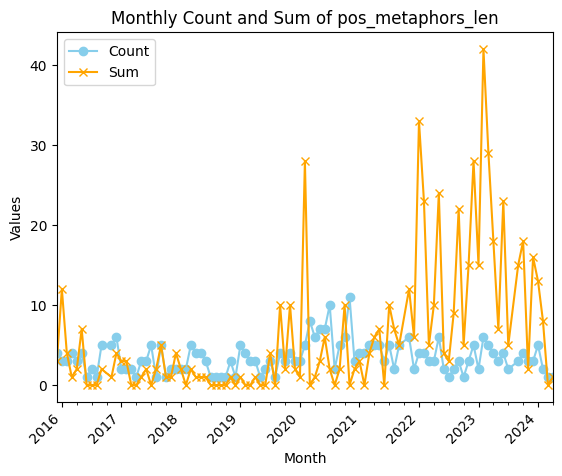

In [5]:
fig, ax = plt.subplots()

# Change to line plot
grouped_data['count'].plot(kind='line', color='skyblue', ax=ax, label='Count', marker='o')
grouped_data['sum'].plot(kind='line', color='orange', ax=ax, label='Sum', marker='x')

# Add title, legend, and labels
ax.set_title('Monthly Count and Sum of pos_metaphors_len')
ax.set_xlabel('Month')
ax.set_ylabel('Values')
plt.legend()

# Adjust x-axis to show 1 in every 10 labels
ticks = ax.get_xticks()
# Ensure there are enough ticks to filter
if len(ticks) > 10:
    selected_ticks = ticks[::10]  # Select every 10th tick
    selected_labels = [grouped_data.index[int(tick)].strftime('%Y-%m') if tick < len(grouped_data.index) else '' for tick in selected_ticks]
    ax.set_xticks(selected_ticks)
    ax.set_xticklabels(selected_labels, rotation=45, ha="right")
else:
    # If not enough ticks, just rotate existing for clarity
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show plot
plt.show()

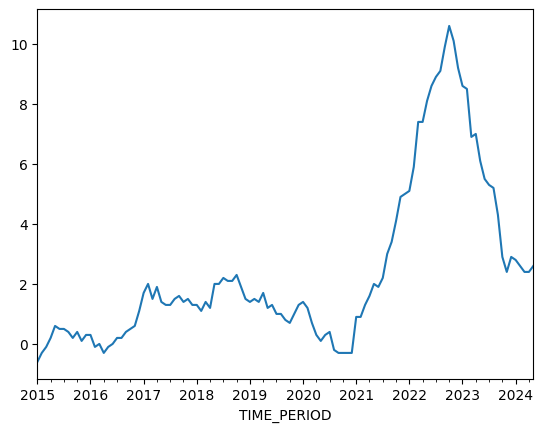

In [6]:
df_in['TIME_PERIOD'] = pd.to_datetime(df_in['TIME_PERIOD']) 
df_in = df_in[['OBS_VALUE', 'TIME_PERIOD']]   
df_in.set_index('TIME_PERIOD', inplace=True)  # Set 'TIME_PERIOD' as the index of df_in


df_in['OBS_VALUE'].plot()  # Plot the 'OBS_VALUE' column
plt.show()

In [7]:
df_ir = pd.read_csv('ECB_InterestRates.csv') # Source: https://data.ecb.europa.eu/data/datasets/FM/FM.B.U2.EUR.4F.KR.MRR_FR.LEV?chart_props=W3sibm9kZUlkIjoiMzQ2NTY5IiwicHJvcGVydGllcyI6W3siY29sb3JIZXgiOiIiLCJjb2xvclR5cGUiOiIiLCJjaGFydFR5cGUiOiJsaW5lY2hhcnQiLCJsaW5lU3R5bGUiOiJTb2xpZCIsImxpbmVXaWR0aCI6IjEuNSIsImF4aXNQb3NpdGlvbiI6ImxlZnQiLCJvYnNlcnZhdGlvblZhbHVlIjpmYWxzZSwiZGF0ZXMiOlsiMjAxNS0wNi0xNFQyMjowMDowMC4wMDBaIiwiMjAyNC0wNi0xMVQyMjowMDowMC4wMDBaIl0sImlzVGRhdGEiOmZhbHNlLCJtb2RpZmllZFVuaXRUeXBlIjoiIiwieWVhciI6ImRhdGV3aXNlIiwic3RhcnREYXRlIjoiMjAxNS0wNi0xNSIsImVuZERhdGUiOiIyMDI0LTA2LTEyIiwic2V0RGF0ZSI6dHJ1ZSwic2hvd1RhYmxlRGF0YSI6ZmFsc2UsImNoYW5nZU1vZGUiOmZhbHNlLCJzaG93TWVudVN0eWxlQ2hhcnQiOmZhbHNlLCJkaXNwbGF5TW9iaWxlQ2hhcnQiOnRydWUsInNjcmVlblNpemUiOiJtYXgiLCJzY3JlZW5XaWR0aCI6MTQ3MCwic2hvd1RkYXRhIjpmYWxzZSwidHJhbnNmb3JtZWRGcmVxdWVuY3kiOiJub25lIiwidHJhbnNmb3JtZWRVbml0Ijoibm9uZSIsImZyZXF1ZW5jeSI6Im5vbmUiLCJ1bml0Ijoibm9uZSIsIm1vZGlmaWVkIjoiZmFsc2UiLCJzZXJpZXNLZXkiOiJkYWlseSAtIGJ1c2luZXNzd2VlayIsInNob3d0YWJsZVN0YXRlQmVmb3JlTWF4U2NyZWVuIjpmYWxzZSwiaXNkYXRhY29tcGFyaXNvbiI6ZmFsc2UsInNlcmllc0ZyZXF1ZW5jeSI6ImRhaWx5IC0gYnVzaW5lc3N3ZWVrIiwiaW50aWFsU2VyaWVzRnJlcXVlbmN5IjoiZGFpbHkgLSBidXNpbmVzc3dlZWsiLCJtZXRhZGF0YURlY2ltYWwiOiI0IiwiaXNUYWJsZVNvcnRlZCI6ZmFsc2UsImlzWWVhcmx5VGRhdGEiOmZhbHNlLCJyZXNwb25zZURhdGFFbmREYXRlIjoiMjAyNC0wNi0xMiIsImlzaW5pdGlhbENoYXJ0RGF0YSI6dHJ1ZSwiaXNEYXRlc0Zyb21EYXRlUGlja2VyIjp0cnVlLCJkYXRlUGlja2VyRW5kRGF0ZSI6IjIwMjQtMDYtMTIiLCJpc0RhdGVQaWNrZXJFbmREYXRlIjp0cnVlLCJzZXJpZXNrZXlTZXQiOiIiLCJkYXRhc2V0SWQiOiI2NyIsImlzQ2FsbGJhY2siOmZhbHNlLCJpc1NsaWRlclRkYXRhIjp0cnVlLCJpc1NsaWRlckRhdGEiOnRydWUsImlzSW5pdGlhbENoYXJ0RGF0YUZyb21HcmFwaCI6ZmFsc2UsImNoYXJ0U2VyaWVzS2V5IjoiRk0uQi5VMi5FVVIuNEYuS1IuTVJSX0ZSLkxFViIsInR5cGVPZiI6IiJ9XX1d
df_ir.rename(columns={'Main refinancing operations - fixed rate tenders (fixed rate) (date of changes) - Level (FM.B.U2.EUR.4F.KR.MRR_FR.LEV)': 'INTEREST RATE'}, inplace=True)
df_ir['TIME_PERIOD'] = pd.to_datetime(df_ir['DATE'])
df_ir = df_ir[['INTEREST RATE', 'TIME_PERIOD']]
df_ir_filtered = df_ir[df_ir['TIME_PERIOD'] >= '2015-01-01']
df_ir_filtered.set_index('TIME_PERIOD', inplace=True)
# Resample to monthly frequency and forward fill missing values
df_ir_monthly = df_ir_filtered.resample('M').ffill()

In [8]:
grouped_data.index = grouped_data.index.to_timestamp()
# Standardize the index to the end of the month for all DataFrames
df_ir_monthly.index = df_ir_monthly.index + pd.offsets.MonthEnd(0)
df_in.index = df_in.index + pd.offsets.MonthEnd(0)
grouped_data.index = pd.to_datetime(grouped_data.index, format='%Y-%m') + pd.offsets.MonthEnd(0)

# Convert index to a column for merging
df_ir_monthly['TIME_PERIOD'] = df_ir_monthly.index
df_in['TIME_PERIOD'] = df_in.index
grouped_data['TIME_PERIOD'] = grouped_data.index

# Set the new columns as the index
df_ir_monthly.set_index('TIME_PERIOD', inplace=True)
df_in.set_index('TIME_PERIOD', inplace=True)
grouped_data.set_index('TIME_PERIOD', inplace=True)

# Merge DataFrames on the date index, keeping only rows with data in all three
df_merged = df_ir_monthly.join(df_in, how='inner').join(grouped_data, how='inner')

# Display the merged DataFrame
print(df_merged.tail())



             INTEREST RATE  OBS_VALUE  count  sum
TIME_PERIOD                                      
2023-12-31             4.5        2.9      3   16
2024-01-31             4.5        2.8      5   13
2024-02-29             4.5        2.6      2    8
2024-03-31             4.5        2.4      1    0
2024-04-30             4.5        2.4      1    1
